# Modelo de lenguaje Co-Occurrence

### Version 1.0

In [1]:
import numpy as np
import pandas as pd
import nltk
from nltk import bigrams, word_tokenize
from nltk.corpus import stopwords
import itertools
import matplotlib.pyplot as plt
import seaborn as sns

#Descargar las stopwords 
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#Leer datos desde el archivo CSV
corpus = pd.read_csv('Valence_train_oc_es.csv', sep=';', on_bad_lines='skip')
corpus

,ID,Tweet,Dimension,Intensity,Description
0,2018-Es-00818,Este año me tocará ir sola a la Convención de ...,valence,0,se infiere un estado emocional neutral or mixto
1,2018-Es-06065,MB si no me equivoco una vez me confundi de sn...,valence,0,se infiere un estado emocional neutral or mixto
2,2018-Es-00417,@cokep Que eres terrible fome! 🙄 Y añejo poh!,valence,-2,se infiere un estado emocional moderadamente n...
3,2018-Es-00861,Gracias por informar temas de contingencia del...,valence,-1,se infiere un estado emocional ligeramente neg...
4,2018-Es-01772,En Maipú hace falta una peluquería ATR,valence,-1,se infiere un estado emocional ligeramente neg...
...,...,...,...,...,...
1561,2018-Es-01295,Sale uno del estadio como todo preocupado.,valence,-1,se infiere un estado emocional ligeramente neg...
1562,2018-Es-04833,"No mames, qué fino.",valence,0,se infiere un estado emocional neutral or mixto
1563,2018-Es-05750,"Me bajo mucho en la hermana del raton, pero e...",valence,-1,se infiere un estado emocional ligeramente neg...
1564,2018-Es-00894,"@vito_cfc @SSFE2017 Jjaakjak , pronto lo haré",valence,1,se infiere un estado emocional ligeramente pos...


In [3]:
#Lista de stopwords en español
stop_words = set(stopwords.words('spanish'))

def generate_co_occurrence_matrix(corpus):
    #Tokenizar el corpus y eliminar stopwords y palabras de menos de 3 caracteres
    filtered_corpus = [
        [word for word in word_tokenize(sentence.lower()) if word not in stop_words and len(word) > 3]
        for sentence in corpus
    ]

    #Crear bigrams a partir de las palabras filtradas
    bi_grams = list(itertools.chain(*[list(bigrams(sentence)) for sentence in filtered_corpus]))

    #Crear vocabulario a partir del corpus filtrado
    vocab = list(set(itertools.chain(*filtered_corpus)))
    vocab_index = {word: i for i, word in enumerate(vocab)}

    #Inicializar la matriz de co-ocurrencia
    co_occurrence_matrix = np.zeros((len(vocab), len(vocab)))

    #Iterar a través de los bigrams tomando la palabra actual y la palabra anterior, y el número de ocurrencias del bigram.
    for bigram in bi_grams:
        current = bigram[1]
        previous = bigram[0]
        pos_current = vocab_index.get(current, None)
        pos_previous = vocab_index.get(previous, None)
        if pos_current is not None and pos_previous is not None:
            co_occurrence_matrix[pos_current][pos_previous] += 1
            co_occurrence_matrix[pos_previous][pos_current] += 1

    #Eliminar valores iguales a 0
    co_occurrence_matrix = np.where(co_occurrence_matrix > 0, co_occurrence_matrix, 0)

    #Retornar la matriz y el índice
    return co_occurrence_matrix, vocab_index

#Crear una lista de textos desde el corpus
data = list(corpus['Tweet'])

#Generar la matriz de co-ocurrencia y el índice de vocabulario
matrix, vocab_index = generate_co_occurrence_matrix(data)

#Crear un DataFrame para mostrar la matriz de co-ocurrencia 
data_matrix = pd.DataFrame(matrix, index=vocab_index, columns=vocab_index)
print(data_matrix)

                esperar  mandado  andresf_garcia  rápido  hablo  \
esperar             0.0      0.0             0.0     0.0    0.0   
mandado             0.0      0.0             0.0     0.0    0.0   
andresf_garcia      0.0      0.0             0.0     0.0    0.0   
rápido              0.0      0.0             0.0     0.0    0.0   
hablo               0.0      0.0             0.0     0.0    0.0   
...                 ...      ...             ...     ...    ...   
complicando         0.0      0.0             0.0     0.0    0.0   
mossos              0.0      0.0             0.0     0.0    0.0   
tirada              0.0      0.0             0.0     0.0    0.0   
ingenio             0.0      0.0             0.0     0.0    0.0   
déjame              0.0      0.0             0.0     0.0    0.0   

                candemazzuchino  tatara  yocreoennacional  🙄😑😑😑😑  defender  \
esperar                     0.0     0.0               0.0    0.0       0.0   
mandado                     0.0     0.0

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:84: UserWarning: Glyph 12301 (\N{RIGHT CORNER BRACKET}) missing from current font.
  fig.canvas.draw()


<Axes: >

C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 12301 (\N{RIGHT CORNER BRACKET}) missing from current font.
  func(*args, **kwargs)
C:\Users\andre\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 12301 (\N{RIGHT CORNER BRACKET}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


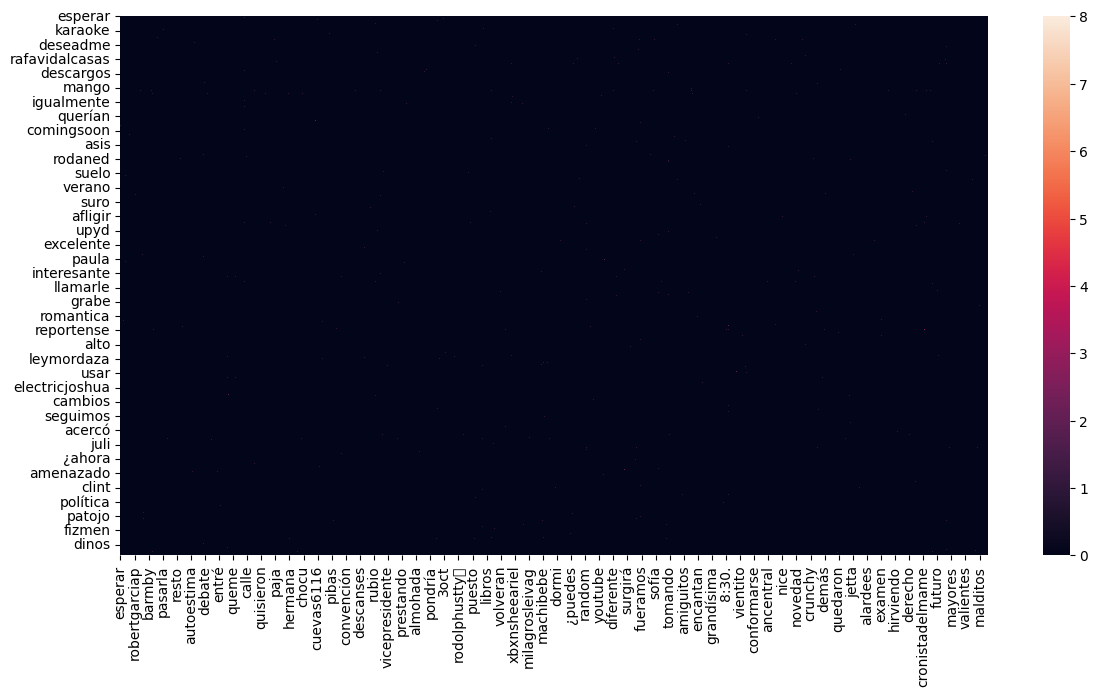

In [4]:
#Configura el tamaño del grafico
plt.figure(figsize=(14,7))

#Se usa seaborn para la creacion de la representacion de los valores
sns.heatmap(data_matrix)